**Внимание!**
Если вы используете Google Collab для взаимодействия с проектом, обязательно запустите ячейку ниже для установки репозитория и необходимых библиотек. Спасибо!

In [1]:
!git clone -l -s https://github.com/sp1dzsaus/zverushkas cloned-repo
%cd cloned-repo
!ls
!pip install -r requirements.txt

d:\SP1DZMAIN\PROJECTS\Zverushkas\zverushkas\cloned-repo


Cloning into 'cloned-repo'...
"ls" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


Defaulting to user installation because normal site-packages is not writeable


# **Зверюшки**

## Генераторы существ 

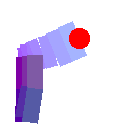

In [2]:
from presets import Default
from random import randint
from bio import AnimalDraw

a = Default(randint(1, 9999999999))
AnimalDraw(a).draw(250)

### Млекопитающее

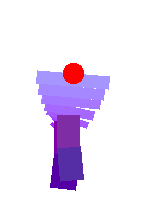

In [3]:
from presets import Mamal
from random import randint
from bio import AnimalDraw

a = Mamal(randint(1, 9999999999))
AnimalDraw(a).draw(250)

### Птица


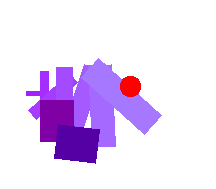

In [4]:
from presets import Bird
from random import randint
from bio import AnimalDraw

a = Bird(randint(1, 9999999999))
AnimalDraw(a).draw(250)

### Дракон

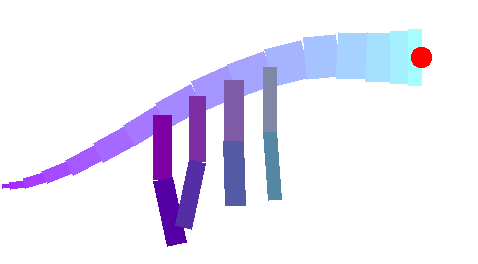

In [5]:
from presets import Dragon
from random import randint
from bio import AnimalDraw

a = Dragon(randint(1, 9999999999))
AnimalDraw(a).draw(250)

### Насекомое

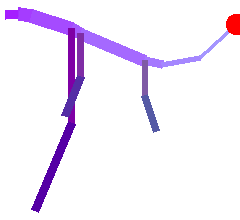

In [6]:
from presets import Insect
from random import randint
from bio import AnimalDraw

a = Insect(randint(1, 9999999999))
AnimalDraw(a).draw(250)

## Параметрический конструктор существ

- `seed` - ключ генератора псевдослучайных чисел. Определяет общую форму животного.
- `length` - количество позвонков животного.
- `gradation` - монотонность длин позвонков.
- `straightness` - прямота животного, монотонность углов позвонков.
- `distribution` - монотонность толщины животного.
- `leg_count` - количество пар лап.
- `ground` - уровень высоты поверхности.

In [1]:
from bio import Animal, AnimalDraw
from ipywidgets import interact
from PIL import ImageDraw


def animal_maker(seed, length, gradation, straightness, distribution, spreadvalue, leg_count, ground):
    global DRAW
    global ANIMAL
    ANIMAL = Animal.from_params(length, gradation / 10, straightness / 50, distribution / 10, spreadvalue / 10, leg_count, seed)
    DRAW = AnimalDraw(ANIMAL)
    DRAW.set_ground_level(1 - ground)
    img1 = DRAW.draw(150)
    img2 = DRAW.draw_from_above(150)
    h = img1.height
    img1 = img1.crop((0, 0, img1.width, img1.height + img2.height))
    img1.paste(img2, (0, h))
    return img1


interact(animal_maker, seed=(1, 999999), length=(7, 15),
         gradation=(2.0, 500.), straightness=(1.0, 500.0), distribution=(50.0, 500.0), spreadvalue=(50.0, 500.0),
         leg_count=(1, 4), ground=(-1.00, 2.00))


interactive(children=(IntSlider(value=500000, description='seed', max=999999, min=1), IntSlider(value=11, desc…

<function __main__.animal_maker(seed, length, gradation, straightness, distribution, spreadvalue, leg_count, ground)>

### Импорт животного в 3D модель STL

In [2]:
DRAW.save_3d('test.stl')

## Алгебра животных

In [9]:
from random import randint
from bio import Animal, AnimalDraw
from presets import *

seed = randint(0, 999999)

print('Общий сид:', seed)

Общий сид: 340109


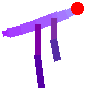

In [19]:
animal1 = Default(seed, paramseed=randint(0, 999999))
AnimalDraw(animal1).draw(150)

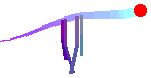

In [25]:
animal2 = Dragon(seed, paramseed=randint(0, 999999))
AnimalDraw(animal2).draw(150)

### Интерполяция животных

Плавный переход параметров из одного животного к другому.
Может использоваться для роста конкретной особи или эволюции вида.

In [26]:
from ipywidgets import interact
from extra_maths import lerp, smoothstep


def animal_interpolator(percent):
    animal3 = Animal.from_array(seed, lerp(animal1.to_array(), animal2.to_array(), smoothstep(percent / 100)))
    return AnimalDraw(animal3).draw(150)


interact(animal_interpolator, percent=(0.00, 100.00))

interactive(children=(FloatSlider(value=50.0, description='percent'), Output()), _dom_classes=('widget-interac…

<function __main__.animal_interpolator(percent)>

### Скрещивание

Случайное перемешивание параметров между двумя животными.

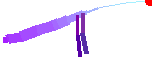

In [27]:
import numpy as np
from random import randint

a = animal1.to_array()
b = animal2.to_array()
c = np.zeros(5)

for i in range(5):
    if randint(0, 1):
        c[i] = a[i]
    else:
        c[i] = b[i]

animal4 = Animal.from_array(seed, c)
AnimalDraw(animal4).draw(150)